# Part 1: Data Preprocessing


'''1. Load the Excel dataset into a pandas DataFrame. Handle any missing values and perform data
exploration to understand the characteristics of the dataset.'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 8)

In [4]:
df.isnull().sum()


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
df = df.rename(columns= {'X1 transaction date':'x1','X2 house age':'x2','X3 distance to the nearest MRT station':'x3','X4 number of convenience stores':'x4','X5 latitude':'x5','X6 longitude':'x6','Y house price of unit area':'y'})
df.head()

,No,x1,x2,x3,x4,x5,x6,y
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df1 = df.copy()
df1.head()

,No,x1,x2,x3,x4,x5,x6,y
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
import datetime
def convert_to_date(year_and_fraction):
    year_part = int(year_and_fraction)
    fractional_part = year_and_fraction - year_part
    days_in_year = 365 + (1 if year_part % 4 == 0 and year_part % 100 != 0 or year_part % 400 == 0 else 0)
    days = int(days_in_year * fractional_part)
    start_date = datetime.datetime(year_part, 1, 1)
    final_date = start_date + datetime.timedelta(days=days)
    return final_date.strftime("%Y-%m-%d")

df['x1'] = df['x1'].apply(convert_to_date)

df.head()

,No,x1,x2,x3,x4,x5,x6,y
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
#date column convert into numeric value
df['x1'] = df['x1'].astype('category')
df['x1'] = df['x1'].cat.codes
df.head()

,No,x1,x2,x3,x4,x5,x6,y
0,1,3,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,3,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,11,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,10,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2,5.0,390.56840,5,24.97937,121.54245,43.1


'''2. Extract the feature columns (X1 to X6) and the target column (Y). Split the dataset into features (X) and
target (y). (70% training & 30% testing ratio).'''

In [9]:
sample = 70
subset = df.sample(sample, random_state=42)
subset.head()

,No,x1,x2,x3,x4,x5,x6,y
358,359,6,1.1,193.5845,6,24.96571,121.54089,45.1
350,351,4,13.2,492.2313,5,24.96515,121.53737,42.3
373,374,5,0.0,274.0144,1,24.97480,121.53059,52.2
399,400,3,12.7,170.1289,1,24.97371,121.52984,37.3
369,370,0,20.2,2185.1280,3,24.96322,121.51237,22.8


In [10]:
x = subset.drop(columns=['No','y'], axis=1)
x.head()

,x1,x2,x3,x4,x5,x6
358,6,1.1,193.5845,6,24.96571,121.54089
350,4,13.2,492.2313,5,24.96515,121.53737
373,5,0.0,274.0144,1,24.97480,121.53059
399,3,12.7,170.1289,1,24.97371,121.52984
369,0,20.2,2185.1280,3,24.96322,121.51237


In [11]:
x2 = x.copy()
x3 = x.copy()

In [12]:
y = subset['y']
y.head()

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
Name: y, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [15]:
print("X_train shape:", xtrain.shape)
print("X_test shape:", xtest.shape)
print("y_train shape:", ytrain.shape)
print("y_test shape:", ytest.shape)

X_train shape: (49, 6)
X_test shape: (21, 6)
y_train shape: (49,)
y_test shape: (21,)


In [16]:
xtrain.head()

,x1,x2,x3,x4,x5,x6
33,7,16.5,323.65500,6,24.97841,121.54281
0,3,32.0,84.87882,10,24.98298,121.54024
94,3,40.9,167.59890,5,24.96630,121.54026
140,7,16.2,289.32480,5,24.98203,121.54348
274,6,27.5,394.01730,7,24.97305,121.53994


'''3. Standardize the feature columns (X1 to X6) using Z-score scaling. Implement the scaling process
manually (without using libraries like `scikit-learn`).'''

In [17]:
import warnings
warnings.filterwarnings('ignore')

for i in x:
    mean = x[i].mean()
    std = x[i].std()
    x[i] = (x[i] - mean) / std
    
x.head()

,x1,x2,x3,x4,x5,x6
358,0.272851,-1.557226,-0.722015,0.705647,-0.112081,0.593503
350,-0.343264,-0.521358,-0.524996,0.374135,-0.157833,0.395022
373,-0.035207,-1.651396,-0.668955,-0.951913,0.630574,0.012719
399,-0.651322,-0.564163,-0.737489,-0.951913,0.541521,-0.029571
369,-1.575494,0.077904,0.591820,-0.288889,-0.315514,-1.014648


# Part 2: Linear Regression

'''4. Implement a simple linear regression model using the scaled features (X1 to X6) to predict the house
price (Y). You can use gradient descent for optimization. Calculate the regression coefficients (intercept
and slope) and write down the regression equation.'''

In [18]:
from sklearn.preprocessing import StandardScaler
sdt = StandardScaler()

In [19]:
columns_to_std = range(0,6)

x2.iloc[:,columns_to_std] = sdt.fit_transform(x2.iloc[:,columns_to_std])
x2.head()

,x1,x2,x3,x4,x5,x6
358,0.274821,-1.568470,-0.727228,0.710742,-0.112890,0.597788
350,-0.345743,-0.525123,-0.528786,0.376836,-0.158973,0.397874
373,-0.035461,-1.663319,-0.673785,-0.958786,0.635127,0.012811
399,-0.656024,-0.568236,-0.742814,-0.958786,0.545431,-0.029784
369,-1.586869,0.078467,0.596093,-0.290975,-0.317793,-1.021974


In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x2,y, test_size=0.3, random_state=42)

In [21]:
xtrain.head()

,x1,x2,x3,x4,x5,x6
33,0.585103,-0.240573,-0.640800,0.710742,0.932194,0.706833
0,-0.656024,1.095945,-0.799460,2.046364,1.308260,0.560872
94,-0.656024,1.863366,-0.744495,0.376836,-0.064339,0.562008
140,0.585103,-0.266442,-0.663612,0.376836,1.230084,0.744885
274,0.274821,0.707924,-0.594047,1.044647,0.491119,0.543834


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg =LinearRegression()

In [24]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [25]:
m = reg.coef_
m

array([ 0.26853007, -3.1728562 ,  0.42767756,  3.64611943,  5.59165328,
        4.96030383])

In [26]:
c = reg.intercept_
c

36.672700513779745

In [27]:
y_pred_train = reg.predict(xtrain)
y_pred_train

array([48.62912729, 50.23606843, 34.06790194, 49.33843554, 43.49895612,
       41.7004894 , 40.28324868, 46.90478466, 45.50632685, 33.73058233,
       41.26114483, 37.37944014, 49.78718015, 20.1839443 , 46.42074574,
       37.38805668, 41.68317161, 20.1763655 , 15.10021577, 49.08723142,
       52.98630148, 15.09932202, 33.5974253 , 33.90063975, 30.98533788,
       41.52163679, 41.62874854, 14.40875958, 47.85866278, 13.56172967,
       49.25511556, 12.39847444, 33.62647178, 36.90622522, 32.44214336,
       31.84796227, 14.96093441, 42.00080533, 41.07764366, 32.0543883 ,
       40.47849142, 43.55111141, 32.19366965, 41.77159671, 43.46646161,
        6.10544117, 32.1759149 , 37.8392257 , 52.33594193])

In [28]:
ytrain.head(20)

33     49.3
0      37.9
94     41.0
140    51.4
274    41.0
15     50.5
272    40.5
271    26.5
84     43.7
42     34.7
361    63.3
402    28.5
222    48.5
55     13.7
225    49.0
399    37.3
291    54.4
93     16.1
73     20.0
262    53.0
Name: y, dtype: float64

In [29]:
y_pred_test = reg.predict(xtest)
y_pred_test

array([50.80780224, 46.33742576, 49.74413828, 28.34533353, 35.78406697,
       29.94138589, 30.32244642, 31.66371523, 50.59856121, 42.3687584 ,
       38.16385966, 53.46135112, 47.83228937, 44.84315968, 15.10021577,
       13.09818974, 28.4298977 , 30.25192775, 45.68465674, 36.67037906,
       43.23947545])

In [30]:
ytest.head(10)

374    49.5
358    45.1
360    47.1
369    22.8
175    36.5
365    29.5
118    30.6
79     26.5
124    57.4
336    35.6
Name: y, dtype: float64

'''It's a multiple linear Regreassion, the equation would be 
y(pred) = m1x1 + m2x2+ ............+mnxn+c'''

'''5. Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared.
Interpret the R-squared value in the context of this regression.'''

In [31]:
from sklearn.metrics import r2_score   #r2_score means reg.score both are same

In [32]:
r2_Squard_Train = r2_score(ytrain,y_pred_train)
r2_Squard_Train

0.6954060616468085

In [33]:
r2_Squard = r2_score(ytest,y_pred_test)
r2_Squard 

0.6503280007285186

# So this Linear Regression Less data low performance and More data high performace

In [34]:
from sklearn.metrics import mean_squared_error 

In [35]:
MSE = mean_squared_error(ytrain, y_pred_train)
MSE

61.818475197255104

# Interpret the R-squared value in the context of this regression.

'''An R-squared value of 0.6954060616468085 suggests that your model is able to capture and explain about 69.54% of the variability in the house price of unit area using the provided features.

This R-squared value is between 0 and 1. A value of 1 would indicate a perfect fit where the model perfectly explains the variability, while a value of 0 would indicate that the model does not explain any of the variability.

A value of 0.6954 can be considered moderately good, especially for complex real-world datasets. It indicates that our model's predictions capture a substantial portion of the variation in the target variable, which is a positive sign.

However, keep in mind that the interpretation of R-squared can depend on the context of our problem. For some domains and problems, an R-squared value above 0.6 might be considered acceptable, while in other cases, higher values might be desired.

It's important to remember that R-squared alone does not tell the whole story of model performance. Other evaluation metrics, the distribution of residuals, and the specific goals of your analysis also need to be considered.'''

# Part 3: Feature Scaling Comparison

'''6. Train another linear regression model without scaling the features. Compare the performance of this
model with the scaled model from Part 2 in terms of convergence speed and prediction accuracy.'''

In [36]:
x3.head()

,x1,x2,x3,x4,x5,x6
358,6,1.1,193.5845,6,24.96571,121.54089
350,4,13.2,492.2313,5,24.96515,121.53737
373,5,0.0,274.0144,1,24.97480,121.53059
399,3,12.7,170.1289,1,24.97371,121.52984
369,0,20.2,2185.1280,3,24.96322,121.51237


In [37]:
y.head()

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
Name: y, dtype: float64

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x3, y, test_size=0.3, random_state=42)


In [39]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [40]:
xtrain.head()

,x1,x2,x3,x4,x5,x6
33,7,16.5,323.65500,6,24.97841,121.54281
0,3,32.0,84.87882,10,24.98298,121.54024
94,3,40.9,167.59890,5,24.96630,121.54026
140,7,16.2,289.32480,5,24.98203,121.54348
274,6,27.5,394.01730,7,24.97305,121.53994


In [41]:
xtest.head()

,x1,x2,x3,x4,x5,x6
374,7,5.4,390.56840,5,24.97937,121.54245
358,6,1.1,193.58450,6,24.96571,121.54089
360,0,32.9,87.30222,10,24.98300,121.54022
369,0,20.2,2185.12800,3,24.96322,121.51237
175,5,30.2,472.17450,3,24.97005,121.53758


In [42]:
xtrain.shape

(49, 6)

In [43]:
ytest.shape

(21,)

In [44]:
c = reg.intercept_
c

-45688.791256198296

In [45]:
m = reg.coef_
m

array([ 8.33199753e-02, -2.73585950e-01,  2.84179015e-04,  1.21745924e+00,
        4.60137706e+02,  2.81715112e+02])

In [46]:
y_pred_train1 = reg.predict(xtrain)
y_pred_train1

array([48.62912729, 50.23606843, 34.06790194, 49.33843554, 43.49895612,
       41.7004894 , 40.28324868, 46.90478466, 45.50632685, 33.73058233,
       41.26114483, 37.37944014, 49.78718015, 20.1839443 , 46.42074574,
       37.38805668, 41.68317161, 20.1763655 , 15.10021577, 49.08723142,
       52.98630148, 15.09932202, 33.5974253 , 33.90063975, 30.98533788,
       41.52163679, 41.62874854, 14.40875958, 47.85866278, 13.56172967,
       49.25511556, 12.39847444, 33.62647178, 36.90622522, 32.44214336,
       31.84796227, 14.96093441, 42.00080533, 41.07764366, 32.0543883 ,
       40.47849142, 43.55111141, 32.19366965, 41.77159671, 43.46646161,
        6.10544117, 32.1759149 , 37.8392257 , 52.33594193])

In [47]:
ytrain.head(20)

33     49.3
0      37.9
94     41.0
140    51.4
274    41.0
15     50.5
272    40.5
271    26.5
84     43.7
42     34.7
361    63.3
402    28.5
222    48.5
55     13.7
225    49.0
399    37.3
291    54.4
93     16.1
73     20.0
262    53.0
Name: y, dtype: float64

In [48]:
r2_Squard1_Train = r2_score(ytrain,y_pred_train1)
r2_Squard1_Train

0.6954060616467748

In [49]:
y_pred_test1 = reg.predict(xtest)
y_pred_test1

array([50.80780224, 46.33742576, 49.74413828, 28.34533353, 35.78406697,
       29.94138589, 30.32244642, 31.66371523, 50.59856121, 42.3687584 ,
       38.16385966, 53.46135112, 47.83228937, 44.84315968, 15.10021577,
       13.09818974, 28.4298977 , 30.25192775, 45.68465674, 36.67037906,
       43.23947545])

In [50]:
ytest.head(10)

374    49.5
358    45.1
360    47.1
369    22.8
175    36.5
365    29.5
118    30.6
79     26.5
124    57.4
336    35.6
Name: y, dtype: float64

In [51]:
r2_Squard1 = r2_score(ytest,y_pred_test1)
r2_Squard1

0.6503280007286546

'''We can se 'part2_score = part3_score' so that their speed and prediction accuracy is same.'''

# Part 4: Visualization and Analysis

'''7. Create scatter plots to visualize the relationship between each feature (X1 to X6) and the target
variable (Y). Discuss the patterns you observe in the plots.'''

# With Standardizationn Plot line and Scatter

In [52]:
import seaborn as sns

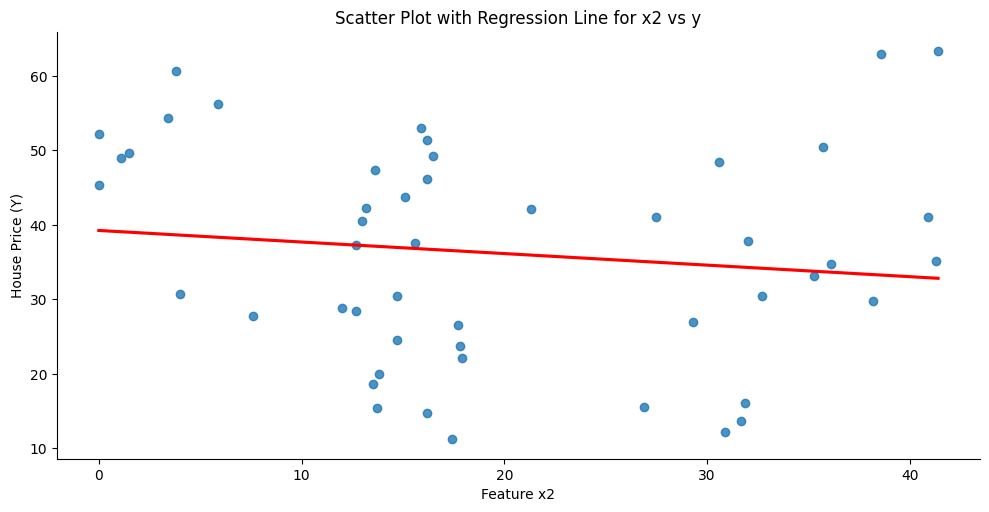

In [53]:
train_data = pd.concat([xtrain, ytrain], axis=1)

# Create a scatter plot with regression line
sns.lmplot(x='x2', y='y', data=train_data, aspect=2, line_kws={'color': 'red'}, ci=None)
plt.title('Scatter Plot with Regression Line for x2 vs y')
plt.xlabel('Feature x2')
plt.ylabel('House Price (Y)')
plt.show()

'''Scatter Plot for x2 vs y:

In the scatter plot for x2 vs y, the x-axis represents the features and the y-axis represents the house prices y.
The red regression line represents the linear relationship between x2 and y.
Points are scattered around the regression line. Data points are distributed, indicating a moderate linear trend. Some data points may be above or below the line, suggesting variations in house prices for different values of x2.'''

# Without Standardizationn Plot line and Scatter

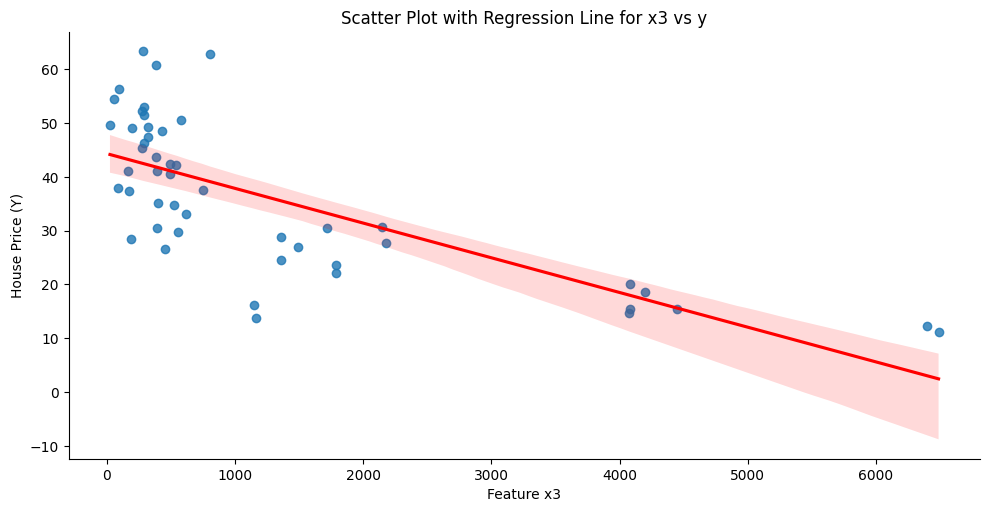

In [54]:
sns.lmplot(x='x3', y='y', data=train_data, aspect=2, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line for x3 vs y')
plt.xlabel('Feature x3')
plt.ylabel('House Price (Y)')
plt.show()

'''8. Visualize the predicted house prices from the scaled model against the actual house prices. Interpret
the results and discuss any discrepancies.'''

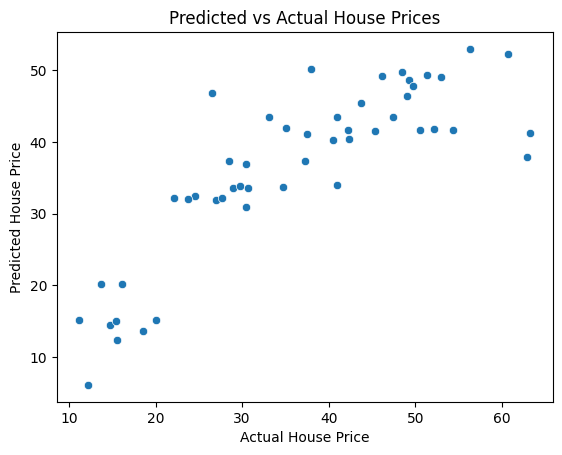

In [55]:
prediction_data = pd.DataFrame({'Actual House Price': ytrain, 'Predicted House Price': y_pred_train})

sns.scatterplot(data=prediction_data, x='Actual House Price', y='Predicted House Price')
plt.title('Predicted vs Actual House Prices')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.show()

'''Interpretation:

In the scatter plot, each point represents a pair of actual house price and predicted house price.
Ideally, the points should fall along a diagonal line (45-degree line), indicating that the predicted prices match the actual prices.
Points above the diagonal line suggest that the model has overestimated the house prices.
Points below the diagonal line suggest that the model has underestimated the house prices.
The spread of points around the diagonal line indicates the level of accuracy of the model's predictions.'''

# Part 5: Advanced Problem (Optional)

'''9. Implement Min-Max scaling for the feature columns (X1 to X6) manually (without using libraries).
Train a linear regression model using the Min-Max scaled features and compare its performance with the
Z-score scaled and unscaled models.'''

In [56]:
def normalization_table(data):
    scaled_data = []
    
    for col in data.columns:
        col_min = data[col].min()
        col_max = data[col].max()
        scaled_col = (data[col] - col_min) /( col_max - col_min)
        scaled_data.append(scaled_col)
    scaled_df = pd.concat(scaled_data, axis=1)
    return scaled_df

normalization = normalization_table(x)
normalization.head()
        
    

,x1,x2,x3,x4,x5,x6
358,0.545455,0.026570,0.026328,0.6,0.593985,0.763632
350,0.363636,0.318841,0.072525,0.5,0.581601,0.723727
373,0.454545,0.000000,0.038770,0.1,0.795002,0.646865
399,0.272727,0.306763,0.022700,0.1,0.770898,0.638363
369,0.000000,0.487923,0.334395,0.3,0.538921,0.440313


In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [58]:
xtrain.head()

,x1,x2,x3,x4,x5,x6
33,0.580908,-0.238849,-0.636207,0.705647,0.925512,0.701766
0,-0.651322,1.088089,-0.793729,2.031694,1.298881,0.556852
94,-0.651322,1.850008,-0.739158,0.374135,-0.063878,0.557980
140,0.580908,-0.264532,-0.658854,0.374135,1.221266,0.739545
274,0.272851,0.702849,-0.589788,1.037159,0.487598,0.539936


In [59]:
xtrain.shape

(49, 6)

In [60]:
xtest.shape

(21, 6)

In [61]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [62]:
reg.coef_

array([ 0.27046894, -3.1957652 ,  0.43076552,  3.67244554,  5.63202675,
        4.99611877])

In [63]:
reg.intercept_

36.672700513779745

In [64]:
y_pret_train2 = reg.predict(xtrain)
y_pret_train2

array([48.62912729, 50.23606843, 34.06790194, 49.33843554, 43.49895612,
       41.7004894 , 40.28324868, 46.90478466, 45.50632685, 33.73058233,
       41.26114483, 37.37944014, 49.78718015, 20.1839443 , 46.42074574,
       37.38805668, 41.68317161, 20.1763655 , 15.10021577, 49.08723142,
       52.98630148, 15.09932202, 33.5974253 , 33.90063975, 30.98533788,
       41.52163679, 41.62874854, 14.40875958, 47.85866278, 13.56172967,
       49.25511556, 12.39847444, 33.62647178, 36.90622522, 32.44214336,
       31.84796227, 14.96093441, 42.00080533, 41.07764366, 32.0543883 ,
       40.47849142, 43.55111141, 32.19366965, 41.77159671, 43.46646161,
        6.10544117, 32.1759149 , 37.8392257 , 52.33594193])

In [65]:
ytrain.head(10)

33     49.3
0      37.9
94     41.0
140    51.4
274    41.0
15     50.5
272    40.5
271    26.5
84     43.7
42     34.7
Name: y, dtype: float64

In [66]:
r2_Squard2 = r2_score(ytrain, y_pret_train2)
r2_Squard2 

0.6954060616468085

# Min-Max to Z-Score

In [67]:
r2_Squard_Train

0.6954060616468085

In [68]:
min_max_to_z_score = r2_Squard_Train - r2_Squard2
min_max_to_z_score

0.0

# Min-Max to Unsclade

In [69]:
r2_Squard1_Train 

0.6954060616467748

In [70]:
min_max_to_unsclade = r2_Squard1_Train - r2_Squard2
min_max_to_unsclade

-3.375077994860476e-14

In [71]:
That means Normalization perform more better than unscaled

SyntaxError: invalid syntax (88110329.py, line 1)